In [80]:
import pandas as pd
import tabulate
from geopy.distance import great_circle
from __future__ import division

times_fname = "/home/wallar/projects/nyc-taxi-analysis/data/nyc-graph/week.csv"
edges_fname = "/home/wallar/projects/nyc-taxi-analysis/data/nyc-graph/edges.csv"
nodes_fname = "/home/wallar/projects/nyc-taxi-analysis/data/nyc-graph/points.csv"

In [81]:
times = pd.read_csv(times_fname, names=range(24))
edges = pd.read_csv(edges_fname, names=["id", "source", "sink"], index_col="id")
nodes = pd.read_csv(nodes_fname, names=["id", "lat", "lon"], index_col="id")

In [111]:
def get_geo_tuple(node):
    return nodes.loc[node]["lat"], nodes.loc[node]["lon"]


def compute_average_time():
    total = None
    mean_total = None
    count = 0
    for i, edge in edges.iterrows():
        src = get_geo_tuple(edge["source"])
        sink = get_geo_tuple(edge["sink"])
        dist = great_circle(src, sink).meters
        for j in xrange(times.loc[i].shape[0]):
            if times.loc[i][j] < 1:
                times.loc[i][j] = 1
        if total is None:
            total = 3.6 * dist / (times.loc[i])
            mean_total = 3.6 * dist / (times.loc[i].mean())
        else:
            total += 3.6 * dist / (times.loc[i])
            mean_total += 3.6 * dist / (times.loc[i].mean())
        count += 1
    return zip(range(24), (total / count).as_matrix()), mean_total / count

In [112]:
table, mean = compute_average_time()

In [114]:
print tabulate.tabulate(table + [("Mean", mean)], ["Hour", "Average Speed [km / h]"], tablefmt="latex")

\begin{tabular}{lr}
\hline
 Hour   &   Average Speed [km / h] \\
\hline
 0      &                  30.6075 \\
 1      &                  24.5275 \\
 2      &                  21.6759 \\
 3      &                  22.8617 \\
 4      &                  19.3065 \\
 5      &                  22.9868 \\
 6      &                  22.057  \\
 7      &                  22.773  \\
 8      &                  19.866  \\
 9      &                  20.9348 \\
 10     &                  19.7517 \\
 11     &                  20.0041 \\
 12     &                  17.6686 \\
 13     &                  18.4376 \\
 14     &                  20.292  \\
 15     &                  18.9005 \\
 16     &                  22.4155 \\
 17     &                  20.8044 \\
 18     &                  23.0887 \\
 19     &                  24.4517 \\
 20     &                  24.0233 \\
 21     &                  25.813  \\
 22     &                  26.1941 \\
 23     &                  29.3271 \\
 Mean   &       

In [147]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def upside_down_gauss(rate):
    sigma = 50 * 1000.0 / 256;
    mu = 500;
    top = math.exp(-pow(rate - mu, 2) / (2 * pow(sigma, 2)));
    bottom = math.sqrt(2 * math.pi * pow(sigma, 2));
    return 1 - 200 * top / bottom;

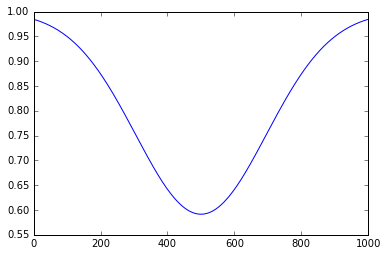

In [148]:
rates = np.linspace(1, 1000, 256)
ys = upside_down_gauss(rates)
plt.plot(rates, ys)